## Description

Typical office material supply company running their operations sees many challenges, one of the major ones being how to measure the effectiveness of sales and marketing operations. We have picked up an imaginary office material supply company **“Office Corp.”** for our analysis. They have tested a telemarketing campaign targeting existing domestic business customers with a random selection of products. For this exercise, a sample of 16,172 customers were targeted. The products being marketed are Desk, Executive Chair, Standard Chair, Monitor, Printer Computer, Insurance, Toner and Office Supplies.  

Office Corp would like to leverage the knowledge gained from this survey (and associated dataset) for future campaigns. Office Corp has hired an analyst team to solve the following three problems using various analytical techniques.  

- Profile the customers that responded to the campaign to understand the characteristics of customers who made purchases. 

- Develop models using the campaign results to target responsive, profitable customers for future campaigns. 

- Summarize and categorize the profitability of the various marketing segments which may be used to optimize future campaigns.

---

## Scientific questions/investigation

Given marketing dataset, there are three key problems to solve.  

- Given campaign period data, looking at customer profile, we aim to predict whether customer will Buy or Not Buy. We intent to frame this as a Classification problem. 

- Among the customers who are predicted as they will buy, we aim to estimate what will be size of purchase. We intent to frame this as a Regression problem. 

- For those customers who are likely to purchase and in general other customers using their historical product purchase data, we aim to predict top 3 products that are likely to be purchased. Also try to predict whether there are any product bundles Office Corp may sell more, etc. We intend to frame this as a Clustering problem.  

In the process of analysis, we intent to carry out,  

- data missing and imputation treatments,  

- data sufficiency and randomized splitting for test-train sets,  

- test amount of data necessary for optimal predictions & accuracy, etc.  

This last topic of determining optimal amount of data is called the ‘sample complexity study’ and it is extremely important for such real-life marketing campaign problems because collecting too much data unnecessarily may cause the company cost overrun. Data scientists should be able to advise the business department on how much data to collect to achieve a decent model performance. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import matplotlib as mpl
mpl.rcParams['figure.dpi']=125

In [2]:
df = pd.read_csv("AddedFeatures_campaign_sale.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12132 entries, 0 to 12131
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Index                              12132 non-null  int64  
 1   Campaign Period Sales              12132 non-null  float64
 2   Buy                                12132 non-null  int64  
 3   Historical Sales Volume            12132 non-null  float64
 4   Number of Prior Year Transactions  12132 non-null  int64  
 5   Number of Transactions             12132 non-null  int64  
 6   Purchase Breadth                   12132 non-null  int64  
 7   Customer_engagement_days           12132 non-null  int64  
 8   Days_since_last_transaction        12132 non-null  int64  
 9   Customer_engagement_length         12132 non-null  object 
 10  Language_group                     12132 non-null  object 
 11  Repurchase Method                  12132 non-null  obj

In [4]:
df.head()

,Index,Campaign Period Sales,Buy,Historical Sales Volume,Number of Prior Year Transactions,Number of Transactions,Purchase Breadth,Customer_engagement_days,Days_since_last_transaction,Customer_engagement_length,...,Email Available,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies
0,0,238.704762,1,146803.428571,15,15,2,19170,2242,Long-term,...,True,False,False,False,False,False,False,True,False,True
1,1,281.680000,1,439984.160000,22,22,1,14530,2368,Long-term,...,True,False,False,False,False,False,False,False,False,True
2,2,432.857143,1,970465.714286,19,19,1,21331,4028,Long-term,...,True,False,False,False,False,False,False,False,False,True
3,3,0.000000,0,230193.600000,17,17,1,13814,2417,Mid-term,...,True,False,False,False,False,False,False,False,False,True
4,4,308.419048,1,182584.076190,16,16,2,15292,3137,Long-term,...,False,False,False,False,False,False,False,False,True,True


In [5]:
df.columns[:12]

Index(['Index', 'Campaign Period Sales', 'Buy', 'Historical Sales Volume',
       'Number of Prior Year Transactions', 'Number of Transactions',
       'Purchase Breadth', 'Customer_engagement_days',
       'Days_since_last_transaction', 'Customer_engagement_length',
       'Language_group', 'Repurchase Method'],
      dtype='object')

In [6]:
num_vars = ['Historical Sales Volume',
       'Number of Prior Year Transactions', 'Number of Transactions',
       'Purchase Breadth', 'Customer_engagement_days',
       'Days_since_last_transaction']
cat_vars = ['Customer_engagement_length',
       'Language_group', 'Repurchase Method', 'Last Transaction Channel',
       'Number of Employees', 'Service Level', 'Do No Disturb',
       'Email Available', 'Desk', 'Executive Chair', 'Standard Chair',
       'Monitor', 'Printer', 'Computer', 'Insurance', 'Toner',
       'Office Supplies']
cat_vars1 = ['Customer_engagement_length',
       'Language_group', 'Repurchase Method', 'Last Transaction Channel',
       'Number of Employees', 'Service Level', 'Do No Disturb',
       'Email Available']
cat_vars2 = ['Desk', 'Executive Chair', 'Standard Chair',
       'Monitor', 'Printer', 'Computer', 'Insurance', 'Toner',
       'Office Supplies']

## Categorical variables plots

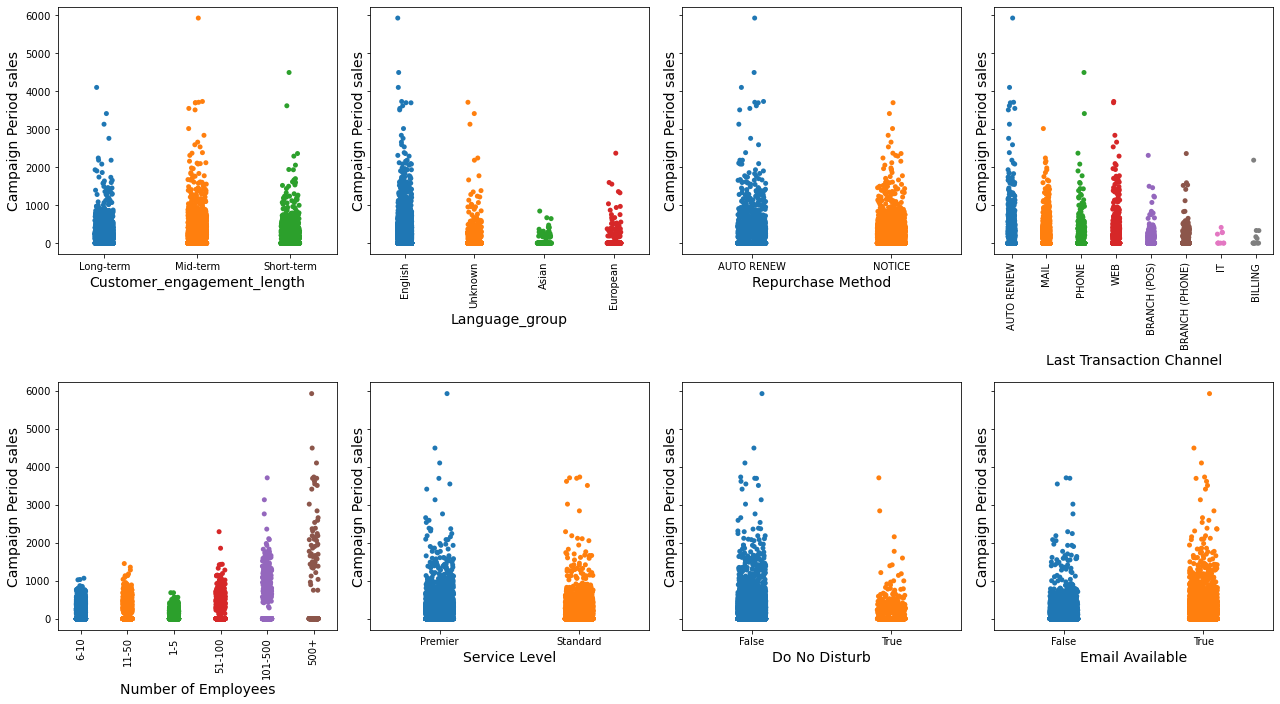

In [8]:
fig, ax = plt.subplots(2,4,figsize=(18,10),squeeze=False,sharey=True)
ax = ax.ravel()
for i in range(8):
    sns.stripplot(x=cat_vars1[i],y='Campaign Period Sales',data=df,ax=ax[i],edgecolor='k')
    ax[i].set_xlabel(cat_vars1[i],fontsize=14)
    ax[i].set_ylabel("Campaign Period sales",fontsize=14)
    if len(df[cat_vars1[i]].unique()) > 3:
        ax[i].set_xticklabels(labels=df[cat_vars1[i]].unique(), rotation = 90)
plt.tight_layout(pad=1.5)
plt.show()

## Numerical variable plots

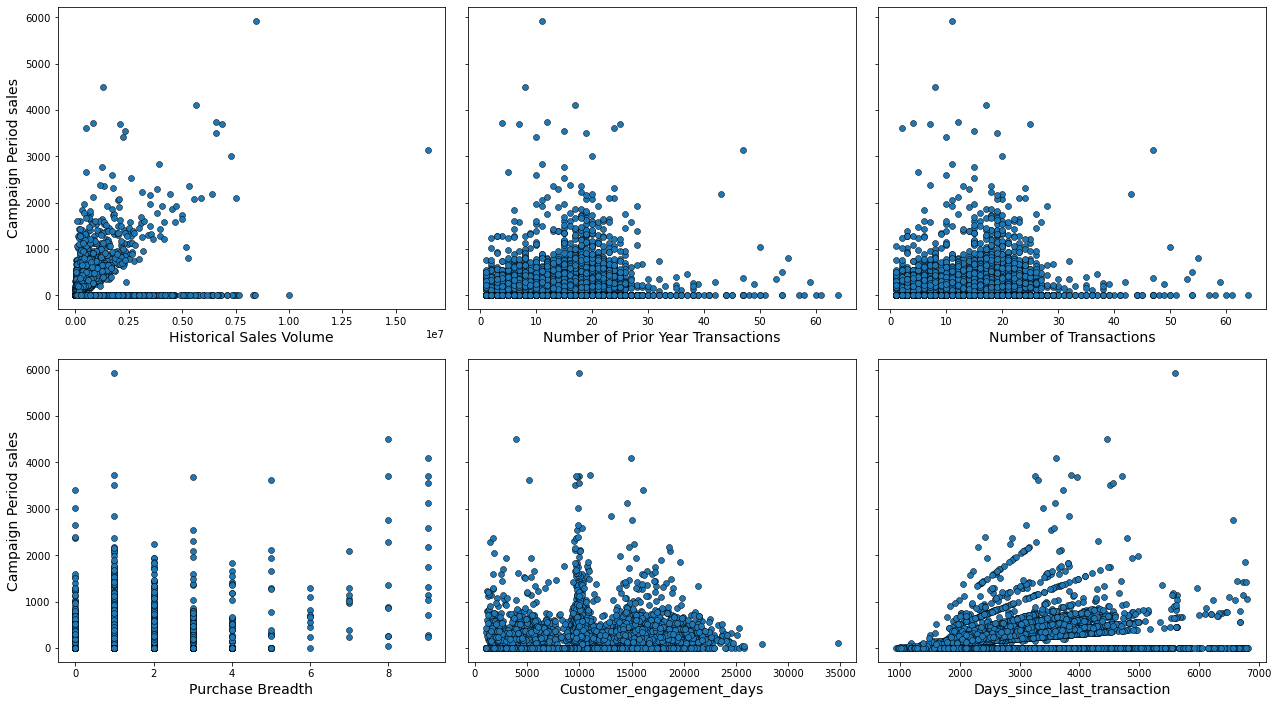

In [9]:
fig, ax = plt.subplots(2,3,figsize=(18,10),squeeze=False,sharey=True)
ax = ax.ravel()
for i in range(6):
    sns.scatterplot(x=num_vars[i],y='Campaign Period Sales',data=df,ax=ax[i],edgecolor='k')
    ax[i].set_xlabel(num_vars[i],fontsize=14)
    ax[i].set_ylabel("Campaign Period sales",fontsize=14)
plt.tight_layout(pad=1.5)
plt.show()

## Violin plots to understand class separation by variables

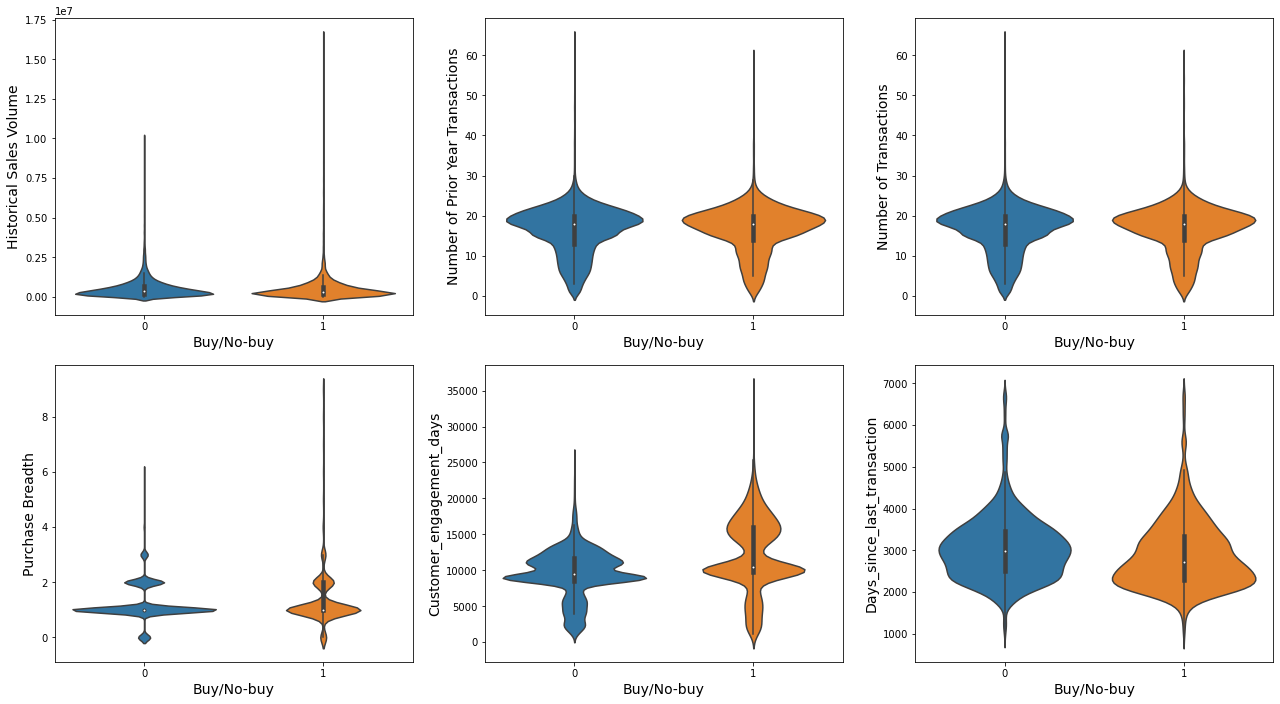

In [10]:
fig, ax = plt.subplots(2,3,figsize=(18,10),squeeze=False)
ax = ax.ravel()
for i in range(6):
    sns.violinplot(x='Buy',y=num_vars[i],data=df,ax=ax[i])
    ax[i].set_xlabel("Buy/No-buy",fontsize=14)
    ax[i].set_ylabel(num_vars[i],fontsize=14)
plt.tight_layout(pad=1.5)
plt.show()